In [15]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import re
from plotnine import ggplot, aes, geom_bar, labs,theme_light,theme,element_text,element_blank,scale_fill_manual
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [16]:
sia = SentimentIntensityAnalyzer()

data = pd.read_csv('data/games_reviews_preprocesado_filtered_english.csv',index_col=None)

def sentiment_analysis(comentario):
    score_descomposition = sia.polarity_scores(comentario)
    score_compound = score_descomposition['compound']

    return score_compound


data['score_analysis'] = data.Review.apply(sentiment_analysis)
data['score_analysis_2'] = data.review_preprocesada.apply(sentiment_analysis)

In [17]:
def score_label(score_puntuation):
    if score_puntuation > 0:
        return "Positivo"
    if score_puntuation < 0:
        return  "Negativo"
    else:
        return "Neutral"
     

data['score_label'] = data['score_analysis'].apply(score_label)
data['score_label_2'] = data['score_analysis_2'].apply(score_label)

In [4]:
data.to_csv('data/data_sentiment_analisis.csv',index= False)

C:\Users\javie\AppData\Local\Temp\ipykernel_22820\997721302.py:22: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


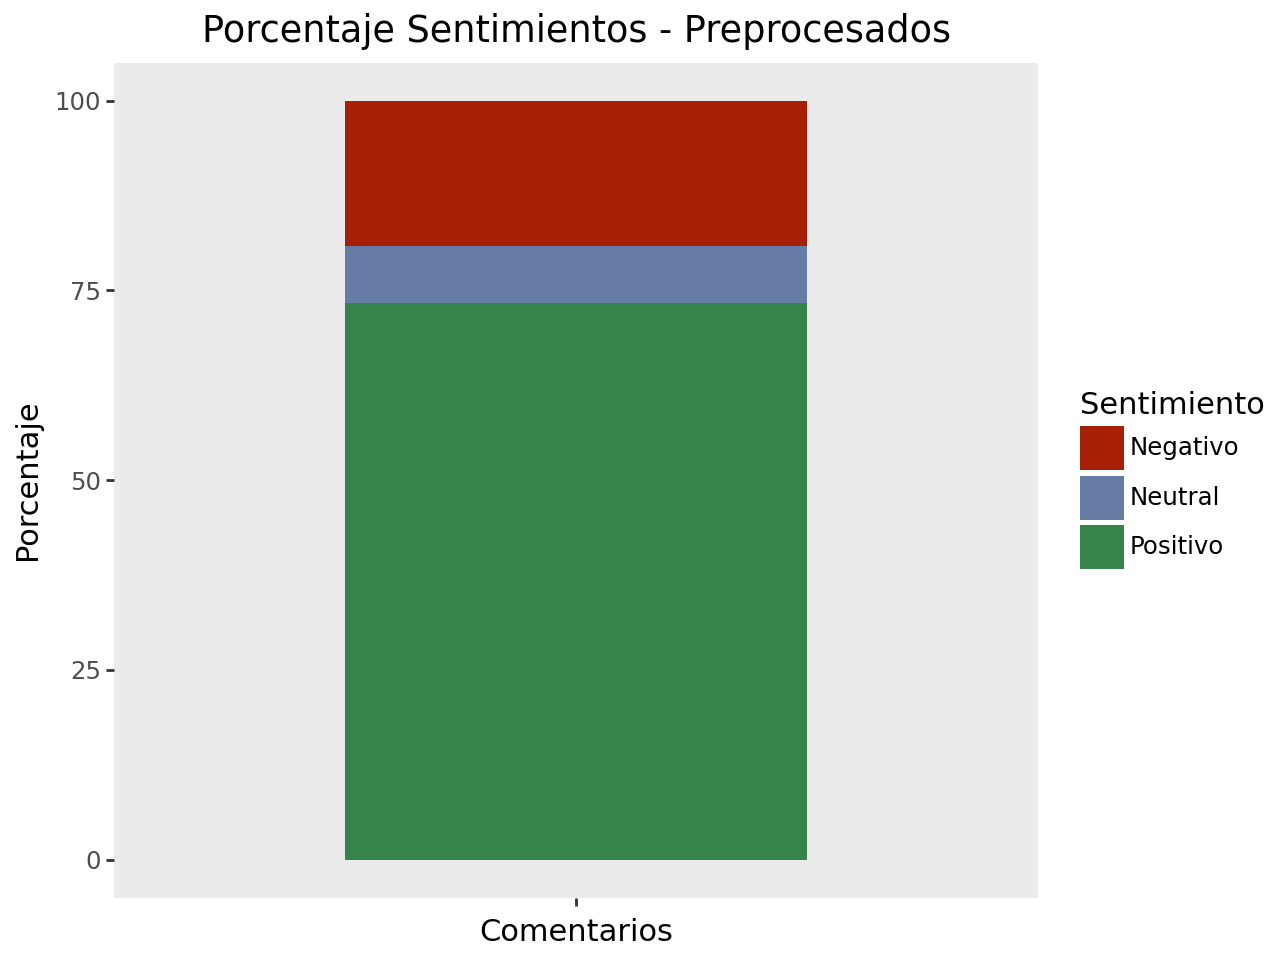

c:\Users\javie\anaconda3\envs\tfm\Lib\site-packages\plotnine\ggplot.py:606: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\Users\javie\anaconda3\envs\tfm\Lib\site-packages\plotnine\ggplot.py:607: PlotnineWarning: Filename: image_topics/porcentaje_sentiment_preprocesado
C:\Users\javie\AppData\Local\Temp\ipykernel_22820\997721302.py:45: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


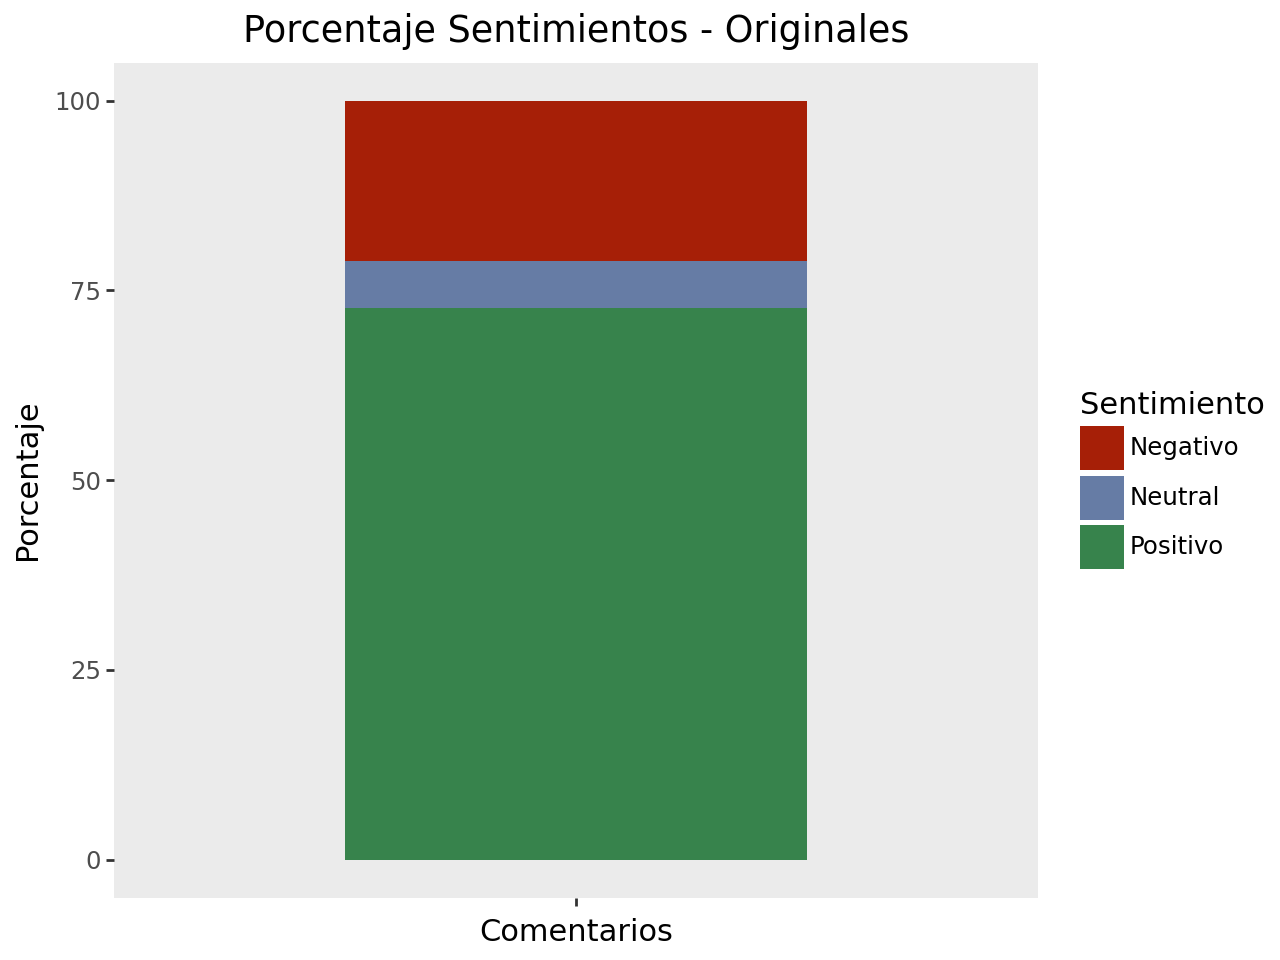

c:\Users\javie\anaconda3\envs\tfm\Lib\site-packages\plotnine\ggplot.py:606: PlotnineWarning: Saving 6.4 x 4.8 in image.
c:\Users\javie\anaconda3\envs\tfm\Lib\site-packages\plotnine\ggplot.py:607: PlotnineWarning: Filename: image_topics/porcentaje_sentiment_original


In [18]:

# Calcular el porcentaje de apariciones de cada etiqueta

counts = data['score_label_2'].value_counts(normalize=True) * 100

# Crear un DataFrame con los porcentajes calculados
data_percentage = pd.DataFrame({
    'Sentimiento': counts.index,
    'porcentaje': counts.values,
    'tipo':''
})

# Crear el gráfico de barras apiladas
plot = (ggplot(data_percentage, aes(x='tipo', y='porcentaje', fill='Sentimiento')) +
        geom_bar(position = "stack",stat='identity',width=0.5) +
        labs(title='Porcentaje Sentimientos - Preprocesados',x='Comentarios',y='Porcentaje') +
        scale_fill_manual(values=["#A61F07", "#667CA5", "#37834C"], labels=["Negativo", "Neutral", "Positivo"]) +  # Colores personalizados
        theme(legend_position='right',
        panel_grid_major=element_blank(),  # Quitar cuadrículas mayores
        panel_grid_minor=element_blank())) # Oculta la leyenda de colores
    
# Mostrar el gráfico
print(plot)
plot.save('image_topics/porcentaje_sentiment_preprocesado')


counts = data['score_label'].value_counts(normalize=True) * 100

# Crear un DataFrame con los porcentajes calculados
data_percentage = pd.DataFrame({
    'Sentimiento': counts.index,
    'porcentaje': counts.values,
    'tipo':''
})

# Crear el gráfico de barras apiladas
plot = (ggplot(data_percentage, aes(x='tipo', y='porcentaje', fill='Sentimiento')) +
        geom_bar(position = "stack",stat='identity',width=0.5) +
        labs(title='Porcentaje Sentimientos - Originales',x='Comentarios',y='Porcentaje') +
        scale_fill_manual(values=["#A61F07", "#667CA5", "#37834C"], labels=["Negativo", "Neutral", "Positivo"]) +  # Colores personalizados
        theme(legend_position='right',
        panel_grid_major=element_blank(),  # Quitar cuadrículas mayores
        panel_grid_minor=element_blank())) # Oculta la leyenda de colores
    
# Mostrar el gráfico
print(plot)
plot.save('image_topics/porcentaje_sentiment_original')

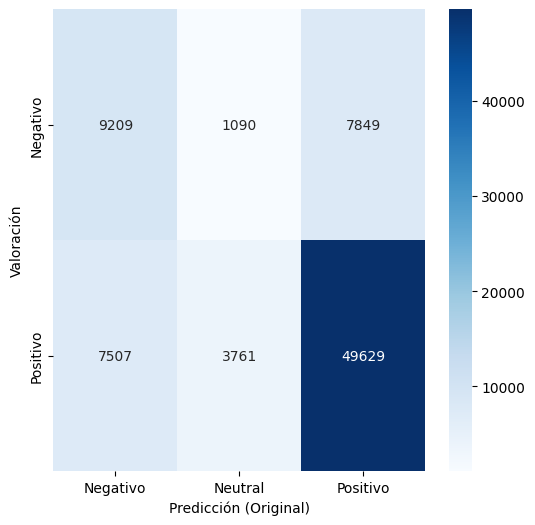

In [26]:

def ajuste_positive(puntuation):
    if puntuation == True:
        return "Positivo"
    else:
        return "Negativo"


data['Positive'] = data['Positive'].apply(ajuste_positive)

conf_matrix = confusion_matrix(data['Positive'], data['score_label']) 
conf_matrix_sf = np.delete(conf_matrix, 1, axis=0) 
plt.figure(figsize = (6,6))
sns.heatmap(conf_matrix_sf, annot=True, fmt='d', cmap='Blues', xticklabels=["Negativo", "Neutral", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.xlabel('Predicción (Original)') 
plt.ylabel('Valoración')

plt.savefig('image_topics/comparacion_sentimientos_original.png',  bbox_inches='tight')
plt.show()


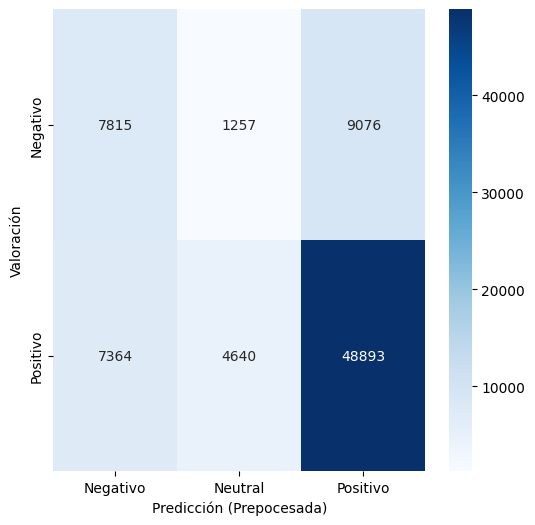

In [27]:
conf_matrix1 = confusion_matrix(data['Positive'], data['score_label_2']) 
conf_matrix_sf1 = np.delete(conf_matrix1, 1, axis=0) 
plt.figure(figsize = (6,6))
sns.heatmap(conf_matrix_sf1, annot=True, fmt='d', cmap='Blues', xticklabels=["Negativo", "Neutral", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.xlabel('Predicción (Prepocesada)') 
plt.ylabel('Valoración')

plt.savefig('image_topics/comparacion_sentimientos_procesado.png',  bbox_inches='tight')
plt.show()


In [40]:
pd.set_option('display.max_colwidth', None)  # Esto asegura que las columnas con strings se muestren completas
data_filtrado = data[(data["Positive"] == "Negativo") & (data["score_label"] == "Positivo")]
display(data_filtrado)

,AppID,ReviewID,UserID,Language,Review,Positive,Bought,Free,is_informative,review_preprocesada_aux,review_preprocesada,detected_language,score_analysis,score_analysis_2,score_label,score_label_2
3,578080,171871227,76561198058890733,english,Chinese goyslop that limits how many games you can play a day.,Negativo,True,False,True,chinese goyslop limit many game play day,chines toyshop limit many game play day,en,0.3400,0.3400,Positivo,Positivo
17,578080,45317341,76561198140027125,english,Its literally a coinflip. good luck. its still shit.,Negativo,True,False,True,literally coinflip good luck still shit,literally coinflip good luck still shit,en,0.3182,0.3182,Positivo,Positivo
32,578080,70367066,76561198046572748,english,The performance and gameplay is so inconsistent. One day everything runs great and I get a dozen kills in a match but the next day I'm getting lasered in every first encounter. Give me a break,Negativo,True,False,True,performance gameplay inconsistent day run great get dozen kill match next day ' get lasere first encounter give break,performance gamelan inconsistent day run great get dozen kill match next day ' get laser first encounter give break,en,0.0772,-0.1531,Positivo,Negativo
38,578080,171720807,76561198174452635,english,Game has fallen off a cliff don't even consider wasting your time or money on this game. Just play Fortnite or Apex if you want to play a Battle Royale.,Negativo,True,False,True,fall cliff even consider waste time money game play want play,fall cliff even consider waste time money game play want play,en,0.3089,0.3182,Positivo,Positivo
39,578080,102572032,76561198157603293,english,"Literal millennial dogwater.\n\nAfter another 6 hours: Still trash. \n\nI'll probably play another 100 hrs.\n\nI've only played an additional 89 hours. No cap, this game has no rizz.",Negativo,True,False,True,literal millennial dogwater hour still trash probably play hrs ' play additional hour cap game rizz,literal millennial dowager hour still trash probably play his ' play additional hour cap game fizz,en,0.1027,0.5859,Positivo,Positivo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78986,1972440,166172107,76561198799135411,english,"Although I really like the idea behind the game (it's an interesting and original way to play chess), I quite simply hate the game itself.\nThe RNG is absolute, you can't do anything without getting lucky. Your choices barely matter, and a pretty decent run can be ended because you suddenly get to choose between two horrible upgrades.\nI'd love to see a version that depends less of luck and more of the player's choices.",Negativo,False,False,True,really like idea game interesting original way play chess quite simply hate game absolute get lucky choice barely matter pretty decent run end suddenly get choose horrible upgrade love see version depend less luck player choice,really like idea game interesting original way play chess quite simply hate game absolute get lucky choice barely matter pretty decent run end suddenly get choose horrible upgrade love see version depend less luck player choice,en,0.8421,0.9209,Positivo,Positivo
79014,1972440,159871252,76561197978079564,english,"Game is fun, love the idea... the problem is the game crashes constantly. In the 1 hour of playtime I've had on the game it has crashed at least 5 times. Once they fix this issue I will play more of it for sure but when I cant even finish 1 whole match without it crashing it makes me not want to play it.",Negativo,False,False,True,game fun love idea problem game crash constantly hour playtime ' game crash least time fix issue play sure even finish whole match crash make want play,game fun love idea problem game crash constantly hour playtime ' game crash least time fix issue play sure even finish whole match crash make want play,en,0.7916,0.6249,Positivo,Positivo
79035,1972440,156274491,76561198242546398,english,too much rng to be fun,Negativo,False,False,True,much rng fun,much ring fun,en